In [24]:
import numpy as np
import pandas as pd

In [25]:
Sleep1 = pd.read_csv('Sleep_Efficiency.csv')
df = pd.DataFrame(Sleep1)
df.loc[df["Gender"] == "Male", "Gender"] = 0
df.loc[df["Gender"] == "Female", "Gender"] = 1
df.loc[df["Smoking status"] == "Yes", "Smoking status"] = 1
df.loc[df["Smoking status"] == "No", "Smoking status"] = 0
df.loc[df["Sleep duration"] < 8.0, "Sleep duration"] = 0
df.loc[df["Sleep duration"] >= 8.0, "Sleep duration"] = 1
Sleep2 = Sleep1.dropna(axis = 0, how ='any')
Sleep = Sleep2.drop(['ID', 'Bedtime', 'Wakeup time', 'Awakenings', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage'], axis = 1)
Sleep.head()

,Age,Gender,Sleep duration,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,1,0.0,0.0,0.0,1,3.0
1,69,0,0.0,0.0,3.0,1,3.0
2,40,1,1.0,0.0,0.0,0,3.0
3,40,1,0.0,50.0,5.0,1,1.0
4,57,0,1.0,0.0,3.0,0,3.0


In [26]:
x = Sleep.drop(['Sleep duration'], axis = 1).values
y = Sleep['Sleep duration'].values
print(x)
print(y)

[[65 1 0.0 0.0 1 3.0]
 [69 0 0.0 3.0 1 3.0]
 [40 1 0.0 0.0 0 3.0]
 ...
 [52 0 25.0 0.0 0 3.0]
 [45 0 0.0 0.0 0 3.0]
 [18 0 50.0 1.0 0 1.0]]
[0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, train_size=0.70)
print(len(x_train))
print(len(x_test))

270
116


In [31]:
from sklearn import tree
from sklearn import metrics

dtc = tree.DecisionTreeClassifier(criterion ='gini', random_state = 1, max_features = 'auto')
dtc = dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.5862068965517241


[Text(0.6492975917431193, 0.9666666666666667, 'X[2] <= 37.5\ngini = 0.449\nsamples = 270\nvalue = [178, 92]'),
 Text(0.408973623853211, 0.9, 'X[3] <= 0.5\ngini = 0.48\nsamples = 183\nvalue = [110, 73]'),
 Text(0.22821100917431192, 0.8333333333333334, 'X[1] <= 0.5\ngini = 0.442\nsamples = 88\nvalue = [59, 29]'),
 Text(0.13761467889908258, 0.7666666666666667, 'X[2] <= 12.5\ngini = 0.41\nsamples = 59\nvalue = [42, 17]'),
 Text(0.0871559633027523, 0.7, 'X[4] <= 0.5\ngini = 0.411\nsamples = 52\nvalue = [37, 15]'),
 Text(0.04128440366972477, 0.6333333333333333, 'X[5] <= 2.5\ngini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(0.01834862385321101, 0.5666666666666667, 'X[0] <= 54.0\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.009174311926605505, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.027522935779816515, 0.5, 'X[0] <= 55.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.01834862385321101, 0.43333333333333335, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Tex

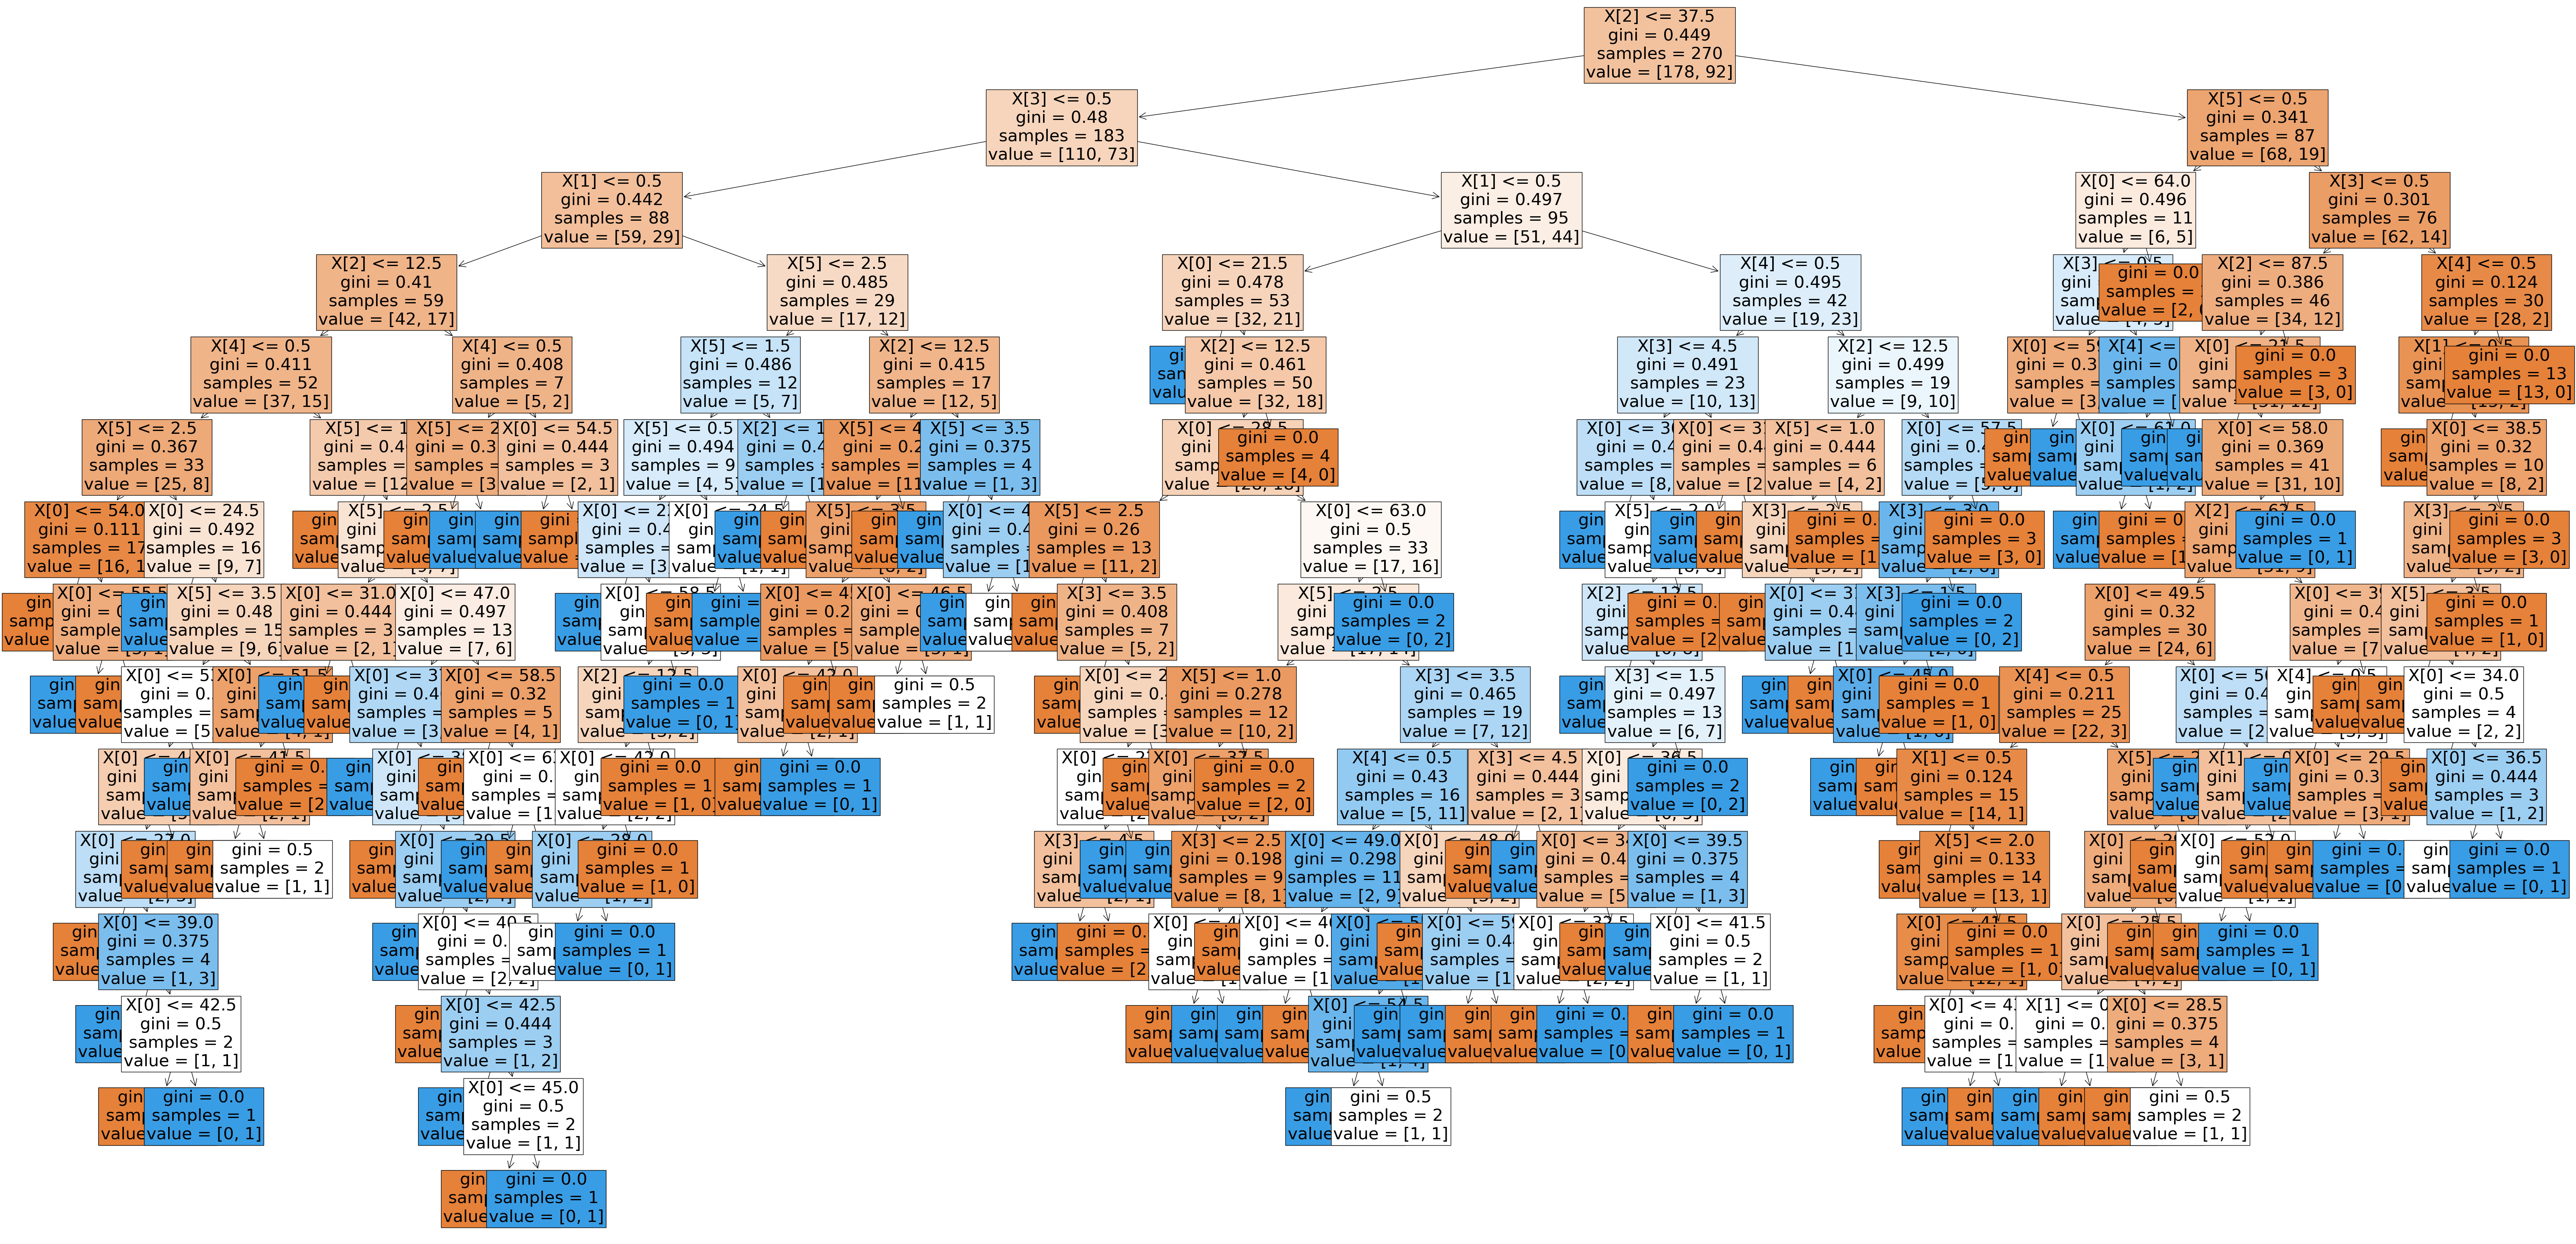

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize = (80, 40))
tree.plot_tree(dtc, filled = 'true', fontsize = 30)

In [34]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(max_features = 'auto')
rfc = rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.6206896551724138
